In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/COURSES/ML_CSE432_Lab/Project/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/COURSES/ML_CSE432_Lab/Project/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 120 files belonging to 2 classes.
Found 30 files belonging to 2 classes.


In [4]:
#Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [5]:
#create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [54]:
history = model.fit(train_ds,epochs=30,validation_data=validation_ds)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 26s 6s/step - accuracy: 0.9604 - loss: 0.4088 - val_accuracy: 0.5000 - val_loss: 9.2959
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 6s/step - accuracy: 0.9565 - loss: 0.1874 - val_accuracy: 0.4667 - val_loss: 6.1760
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 6s/step - accuracy: 0.9892 - loss: 0.4560 - val_accuracy: 0.5000 - val_loss: 3.1528
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 26s 6s/step - accuracy: 0.9731 - loss: 0.4886 - val_accuracy: 0.5333 - val_loss: 6.7201
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 6s/step - accuracy: 0.9698 - loss: 0.3466 - val_accuracy: 0.5667 - val_loss: 6.5858
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 26s 6s/step - accuracy: 0.9733 - loss: 0.3809 - val_accuracy: 0.6333 - val_loss: 3.2768
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 6s/step - accuracy: 0.9529 - loss: 0.4989 - val_accuracy: 0.4667 - val_loss: 7.0646
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 6s/step - accuracy: 0.9915 - loss: 0.1343 - val_accuracy: 0.4667 - val_loss: 10.6391
Epoch 9

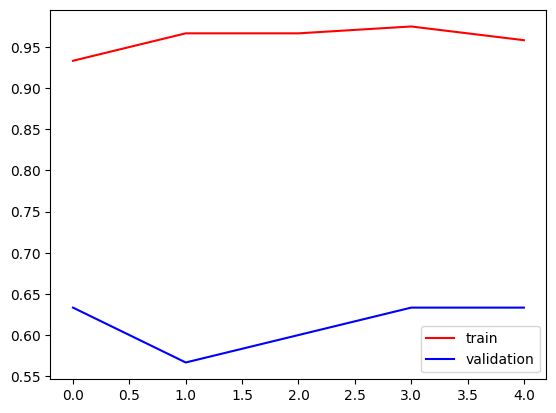

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

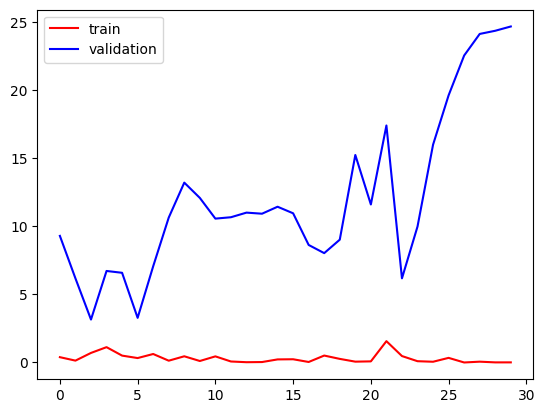

In [55]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [56]:
import cv2

In [71]:
test_img=cv2.imread('/content/drive/MyDrive/COURSES/ML_CSE432_Lab/Project/dog.jpg')

In [77]:
test_img=cv2.imread('/content/drive/MyDrive/COURSES/ML_CSE432_Lab/Project/cat.jpg')

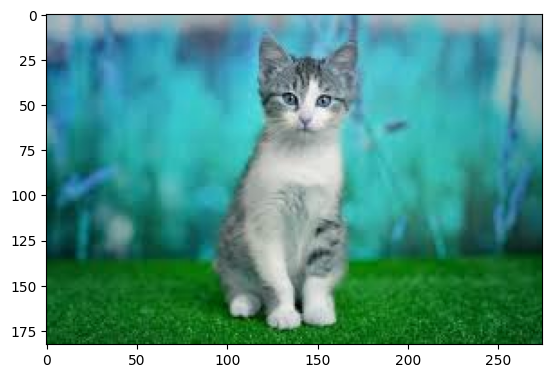

In [78]:
plt.imshow(test_img)

In [79]:
test_img.shape

(183, 275, 3)

In [80]:
test_img=cv2.resize(test_img,(256,256))

In [81]:
test_input=test_img.reshape((1,256,256,3))

In [82]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[1.]], dtype=float32)